In [2]:
from helpers.data_load import load_data_from_txt
from typing import List, Tuple
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from helpers.data_helpers import get_sequence
import matplotlib.pyplot as plt
from numpy.linalg import norm
from tqdm.notebook import tqdm
import faiss
import warnings
warnings.filterwarnings('ignore')


from data_struct.head_tail_struct import HeadTail

In [3]:
data = load_data_from_txt(path='data/data.txt')

In [4]:
a = get_sequence(df=data, col_name='open', start_point=0, end_point=5)
b = get_sequence(df=data, col_name='open', start_point=5, end_point=10)

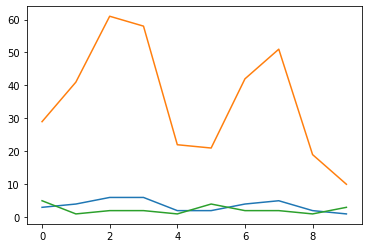

In [6]:
a = np.array([3,4,6,6,2,2,4,5,2,1])
b = np.array([29,41,61,58,22,21,42,51,19,10])
c = np.array([5,1,2,2,1,4,2,2,1,3])

plt.plot(a)
plt.plot(b)
plt.plot(c)

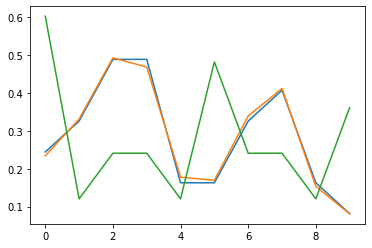

In [7]:
plt.plot(a/norm(a))
plt.plot(b/norm(b))
plt.plot(c/norm(c))

In [8]:
dataset_seq = list()
step = 500
margin = 35
col_name = 'open'

i = 0
start_point_iter, end_point_iter = 0, 0 
while end_point_iter <= data.shape[0]:
    
    start_point_iter = i * margin
    end_point_iter = step + i * margin
    # print(f'slice values: {start_point_iter}:{end_point_iter}')
    current_seq = get_sequence(
        df=data, col_name=col_name, 
        start_point=start_point_iter, 
        end_point=end_point_iter)
    dataset_seq.append(current_seq / norm(current_seq))
    i += 1
print(f'dataset length: {len(dataset_seq)}')
dataset_seq = np.stack(dataset_seq[:-1], axis=0).astype('float32')
print(f'sequences dataset shape: {dataset_seq.shape}')

dataset length: 536
sequences dataset shape: (535, 500)


In [9]:
dim = 500
nb = dataset_seq.shape[0]
nq = 10
np.random.seed(111)

print(dataset_seq.shape)

index = faiss.IndexFlatL2(dim)
print(index.ntotal) # before added vectors to index  
index.add(dataset_seq)
print(index.ntotal) # after added vectors to index

(535, 500)
0
535


In [10]:
topn = 50
query = np.expand_dims(dataset_seq[20], axis=0)
distances, indexes = index.search(query, topn) 

In [11]:
indexes, distances

(array([[ 20, 529, 530, 278, 280,  21,  19, 279,  41, 281,  40, 528,  73,
         277, 357,  22,  74, 163, 345, 248, 531, 466,  18, 164, 204,  62,
         206, 356, 521, 276, 249, 282, 527, 522, 203, 415, 344,  76, 115,
         465, 274, 251, 162,  75, 355, 467,  72, 123, 266, 250]],
       dtype=int64),
 array([[0.0000000e+00, 8.0530100e-07, 8.5046793e-07, 8.5769426e-07,
         1.1624052e-06, 1.2758175e-06, 1.2997400e-06, 1.3952788e-06,
         1.4462636e-06, 1.4940899e-06, 1.5316344e-06, 1.5863693e-06,
         1.6181890e-06, 1.6610094e-06, 1.6672336e-06, 1.7611998e-06,
         1.8371397e-06, 1.8715150e-06, 1.9816355e-06, 2.0691307e-06,
         2.0987463e-06, 2.1028741e-06, 2.1273547e-06, 2.1970375e-06,
         2.2224997e-06, 2.2396400e-06, 2.2592828e-06, 2.2676766e-06,
         2.2970016e-06, 2.3139437e-06, 2.3422142e-06, 2.3562727e-06,
         2.3739576e-06, 2.3902874e-06, 2.3973973e-06, 2.4022079e-06,
         2.4495660e-06, 2.4541214e-06, 2.4675446e-06, 2.4769649e-06,
 

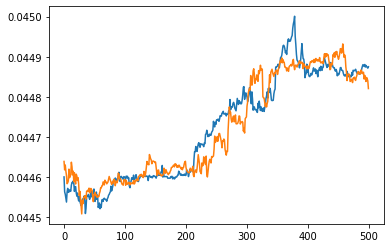

In [15]:
plt.plot(dataset_seq[20])
plt.plot(dataset_seq[529])

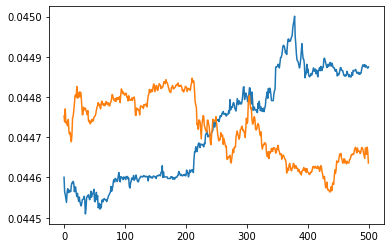

In [16]:
plt.plot(dataset_seq[20])
plt.plot(dataset_seq[230])

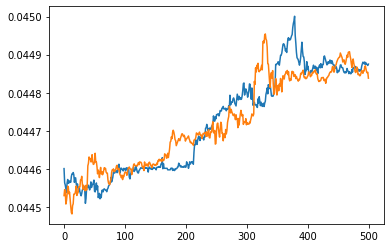

In [18]:
plt.plot(dataset_seq[20])
plt.plot(dataset_seq[279])

In [34]:
hts_20 = HeadTail(dataset_seq[20], head_size=450, tail_size=50)
hts_279 = HeadTail(dataset_seq[279], head_size=450, tail_size=50)
hts_230 = HeadTail(dataset_seq[230], head_size=450, tail_size=50)

In [37]:
# hts_20.show_plot()
# hts_279.show_plot()
# hts_230.show_plot()
# plt.plot(hts_20.sequence)
